In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [8]:
obj_df = df.select_dtypes(include=['object']).copy().reset_index()
obj_df
obj_df_test = df_test.select_dtypes(include=['object']).copy().reset_index()
obj_df_test

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [9]:
obj_df = obj_df.fillna("Not Listed")
obj_df
obj_df_test = obj_df_test.fillna("Not Listed")
obj_df_test

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,RH,Pave,Not Listed,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Not Listed,MnPrv,Not Listed,WD,Normal
1,1,RL,Pave,Not Listed,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Not Listed,Not Listed,Gar2,WD,Normal
2,2,RL,Pave,Not Listed,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,Not Listed,MnPrv,Not Listed,WD,Normal
3,3,RL,Pave,Not Listed,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,Not Listed,Not Listed,Not Listed,WD,Normal
4,4,RL,Pave,Not Listed,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,Attchd,RFn,TA,TA,Y,Not Listed,Not Listed,Not Listed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,RM,Pave,Not Listed,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Not Listed,Not Listed,Not Listed,Not Listed,Y,Not Listed,Not Listed,Not Listed,WD,Normal
1455,1455,RM,Pave,Not Listed,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,CarPort,Unf,TA,TA,Y,Not Listed,Not Listed,Not Listed,WD,Abnorml
1456,1456,RL,Pave,Not Listed,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,Not Listed,Not Listed,Not Listed,WD,Abnorml
1457,1457,RL,Pave,Not Listed,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Not Listed,Not Listed,Not Listed,Not Listed,Y,Not Listed,MnPrv,Shed,WD,Normal


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_df = obj_df.apply(le.fit_transform)
obj_df_test = obj_df_test.apply(le.fit_transform)
obj_df

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,3,1,1,3,3,0,4,0,5,...,1,2,5,5,2,3,4,1,8,4
1,1,3,1,1,3,3,0,2,0,24,...,1,2,5,5,2,3,4,1,8,4
2,2,3,1,1,0,3,0,4,0,5,...,1,2,5,5,2,3,4,1,8,4
3,3,3,1,1,0,3,0,0,0,6,...,5,3,5,5,2,3,4,1,8,0
4,4,3,1,1,0,3,0,2,0,15,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,3,1,1,3,3,0,4,0,8,...,1,2,5,5,2,3,4,1,8,4
1456,1456,3,1,1,3,3,0,4,0,14,...,1,3,5,5,2,3,2,1,8,4
1457,1457,3,1,1,3,3,0,4,0,6,...,1,2,5,5,2,3,0,3,8,4
1458,1458,3,1,1,3,3,0,4,0,12,...,1,3,5,5,2,3,4,1,8,4


In [11]:
int_df = df.select_dtypes(include=['int64']).copy().reset_index()
int_df_test = df_test.select_dtypes(include=['int64']).copy().reset_index()
int_df

,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,8450,7,5,2003,2003,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,9600,6,8,1976,1976,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,11250,7,5,2001,2002,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,9550,7,5,1915,1970,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,14260,8,5,2000,2000,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,7917,6,5,1999,2000,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1456,1457,20,13175,6,6,1978,1988,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1457,1458,70,9042,7,9,1941,2006,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1458,1459,20,9717,5,6,1950,1996,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [12]:
int_df = int_df.fillna(0)
int_df_test = int_df_test.fillna(0)
int_df

,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,8450,7,5,2003,2003,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,9600,6,8,1976,1976,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,11250,7,5,2001,2002,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,9550,7,5,1915,1970,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,14260,8,5,2000,2000,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,7917,6,5,1999,2000,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1456,1457,20,13175,6,6,1978,1988,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1457,1458,70,9042,7,9,1941,2006,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1458,1459,20,9717,5,6,1950,1996,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [13]:
float_df = df.select_dtypes(include=['float64']).copy().reset_index()
float_df_test = df_test.select_dtypes(include=['float64']).copy().reset_index()
float_df

,index,LotFrontage,MasVnrArea,GarageYrBlt
0,0,65.0,196.0,2003.0
1,1,80.0,0.0,1976.0
2,2,68.0,162.0,2001.0
3,3,60.0,0.0,1998.0
4,4,84.0,350.0,2000.0
...,...,...,...,...
1455,1455,62.0,0.0,1999.0
1456,1456,85.0,119.0,1978.0
1457,1457,66.0,0.0,1941.0
1458,1458,68.0,0.0,1950.0


In [14]:
float_df = float_df.fillna(0)
float_df_test = float_df_test.fillna(0)
float_df

,index,LotFrontage,MasVnrArea,GarageYrBlt
0,0,65.0,196.0,2003.0
1,1,80.0,0.0,1976.0
2,2,68.0,162.0,2001.0
3,3,60.0,0.0,1998.0
4,4,84.0,350.0,2000.0
...,...,...,...,...
1455,1455,62.0,0.0,1999.0
1456,1456,85.0,119.0,1978.0
1457,1457,66.0,0.0,1941.0
1458,1458,68.0,0.0,1950.0


In [15]:
df = obj_df.merge(int_df, on="index").merge(float_df, on="index")
df_test = obj_df_test.merge(int_df_test, on="index").merge(float_df_test, on="index")
df

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,0,3,1,1,3,3,0,4,0,5,...,0,0,0,0,2,2008,208500,65.0,196.0,2003.0
1,1,3,1,1,3,3,0,2,0,24,...,0,0,0,0,5,2007,181500,80.0,0.0,1976.0
2,2,3,1,1,0,3,0,4,0,5,...,0,0,0,0,9,2008,223500,68.0,162.0,2001.0
3,3,3,1,1,0,3,0,0,0,6,...,0,0,0,0,2,2006,140000,60.0,0.0,1998.0
4,4,3,1,1,0,3,0,2,0,15,...,0,0,0,0,12,2008,250000,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,3,1,1,3,3,0,4,0,8,...,0,0,0,0,8,2007,175000,62.0,0.0,1999.0
1456,1456,3,1,1,3,3,0,4,0,14,...,0,0,0,0,2,2010,210000,85.0,119.0,1978.0
1457,1457,3,1,1,3,3,0,4,0,6,...,0,0,0,2500,5,2010,266500,66.0,0.0,1941.0
1458,1458,3,1,1,3,3,0,4,0,12,...,0,0,0,0,4,2010,142125,68.0,0.0,1950.0


In [16]:
df.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [17]:
df_test

,index,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0,3,1,1,3,3,0,4,0,12,...,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,1,4,1,1,0,3,0,0,0,12,...,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,2,4,1,1,0,3,0,4,0,8,...,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0
3,3,4,1,1,0,3,0,4,0,8,...,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.0,2.0,470.0
4,4,4,1,1,0,1,0,4,0,22,...,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,5,1,1,3,3,0,4,0,10,...,0.0,0.0,0.0,546.0,546.0,0.0,0.0,0.0,0.0,0.0
1455,1455,5,1,1,3,3,0,4,0,10,...,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0
1456,1456,4,1,1,3,3,0,4,0,11,...,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0
1457,1457,4,1,1,3,3,0,4,0,11,...,0.0,337.0,0.0,575.0,912.0,0.0,1.0,0.0,0.0,0.0


In [18]:
df.columns

Index(['index', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces

In [19]:
df_test.columns

Index(['index', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea',

In [21]:
X = df.drop(['Id', 'index', 'SalePrice'], axis = 1)
y = df.SalePrice.values

id = df_test.Id
X_test = df_test.drop(['Id', 'index'], axis = 1)
X_test.shape

(1459, 79)

In [22]:
X_test.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Mo

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1022, 79), (438, 79), (1022,), (438,))

In [17]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

In [24]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sys

## xgboost

In [25]:
import xgboost as xgb
evals_result = {}
model_xgb = xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_round=150, n_estimators=150, evals_result=evals_result)
model_xgb.fit(X_train, y_train)
print(model_xgb.score(X_train, y_train))

[01:58:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { evals_result, num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9959914663510046


In [26]:
y_pred = model_xgb.predict(X_val)
y_pred = y_pred.astype(int)
print(model_xgb.score(X_val, y_val))

0.9237934539242866


In [27]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse

23326.78404375967

In [28]:
import tensorflow as tf
model_xgb.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)])

[01:58:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { evals_result, num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:178868.95312	validation_1-rmse:180789.98438
[1]	validation_0-rmse:162364.09375	validation_1-rmse:164323.95312
[2]	validation_0-rmse:147198.76562	validation_1-rmse:149257.29688
[3]	validation_0-rmse:133704.32812	validation_1-rmse:136417.31250
[4]	validation_0-rmse:121292.42969	validation_1-rmse:124684.60938
[5]	validation_0-rmse:110332.98438	validation_1-rmse:114312.47656
[6]	validation_0-rmse:100171.01562	validation_1-rmse:104786.84375
[7]	validation_0-rmse:91318.32812	validation_1-rmse:96004.88281
[8]	validation_0-rmse:83111.44531	validation_1-rmse:87973.44531
[9]	valid

[121]	validation_0-rmse:6265.11084	validation_1-rmse:23255.58789
[122]	validation_0-rmse:6212.76709	validation_1-rmse:23256.94727
[123]	validation_0-rmse:6188.91699	validation_1-rmse:23262.46094
[124]	validation_0-rmse:6150.62695	validation_1-rmse:23257.07617
[125]	validation_0-rmse:6089.63281	validation_1-rmse:23261.12695
[126]	validation_0-rmse:6065.16162	validation_1-rmse:23265.47656
[127]	validation_0-rmse:6028.30713	validation_1-rmse:23252.61719
[128]	validation_0-rmse:5981.95068	validation_1-rmse:23250.95312
[129]	validation_0-rmse:5933.82568	validation_1-rmse:23248.60352
[130]	validation_0-rmse:5866.39062	validation_1-rmse:23275.20312
[131]	validation_0-rmse:5808.77588	validation_1-rmse:23295.42383
[132]	validation_0-rmse:5719.15674	validation_1-rmse:23286.53320
[133]	validation_0-rmse:5660.24805	validation_1-rmse:23298.78711
[134]	validation_0-rmse:5605.00928	validation_1-rmse:23286.17188
[135]	validation_0-rmse:5546.12500	validation_1-rmse:23296.74805
[136]	validation_0-rmse:5

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, evals_result={},
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, num_round=150, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model_xgb.evals_result()

{'validation_0': {'rmse': [178868.953125,
   162364.09375,
   147198.765625,
   133704.328125,
   121292.429688,
   110332.984375,
   100171.015625,
   91318.328125,
   83111.445313,
   75841.53125,
   69231.28125,
   63240.828125,
   57947.148438,
   53129.914063,
   48657.714844,
   44847.476563,
   41216.878906,
   38193.753906,
   35323.089844,
   32941.203125,
   30674.412109,
   28691.359375,
   26929.384766,
   25369.714844,
   23973.259766,
   22730.039063,
   21577.697266,
   20511.345703,
   19587.412109,
   18800.871094,
   18120.875,
   17410.064453,
   16812.298828,
   16236.701172,
   15804.386719,
   15409.195313,
   14998.719727,
   14572.925781,
   14202.599609,
   13935.677734,
   13674.859375,
   13407.355469,
   13183.748047,
   12945.720703,
   12752.700195,
   12595.381836,
   12465.554688,
   12263.214844,
   12120.689453,
   11945.100586,
   11810.43457,
   11713.605469,
   11626.673828,
   11470.990234,
   11391.561523,
   11217.435547,
   11111.633789,
   1102

In [30]:
eval_result = model_xgb.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

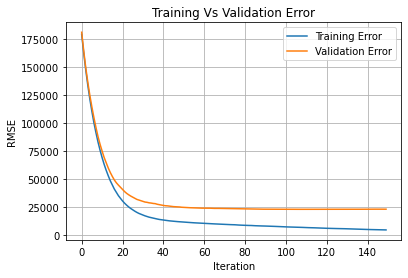

In [31]:
plt.plot(training_rounds,eval_result['validation_0']['rmse'],label='Training Error')
plt.plot(training_rounds,eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

In [32]:
result = model_xgb.predict(X_val)
result[:5]

array([213126.25 , 174881.03 , 116107.1  ,  79704.836, 144233.06 ],
      dtype=float32)

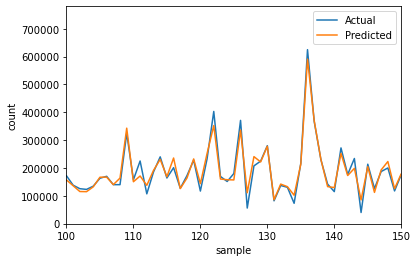

In [33]:
plt.plot(y_val, label='Actual')
plt.plot(result, label='Predicted')
plt.xlabel('sample')
plt.ylabel('count')
plt.xlim([100,150])
plt.legend()
plt.show()

In [34]:
col = X.columns
X_test = X_test[col]

In [35]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((1022, 79), (1022,), (438, 79), (438,), (1459, 79))

In [36]:
y_pred = model_xgb.predict(X_test)
y_pred

array([123610.7 , 162364.84, 184203.38, ..., 159184.16, 124798.85,
       221766.6 ], dtype=float32)

In [37]:
y_pred = pd.DataFrame({'Id': id, 'SalePrice': y_pred})

y_pred.to_csv('submission.csv', index=False)
print('saved')

saved


In [38]:
submission = pd.read_csv("submission.csv")
submission

,Id,SalePrice
0,1461,123610.70
1,1462,162364.84
2,1463,184203.38
3,1464,179372.47
4,1465,187336.42
...,...,...
1454,2915,79521.82
1455,2916,87214.38
1456,2917,159184.16
1457,2918,124798.85


## AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model_adb = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),random_state=1,n_estimators=1000, loss='exponential')
model_adb.fit(X_train, y_train)
print(model_adb.score(X_train, y_train))

0.9998870544435537


In [32]:
y_pred = model_adb.predict(X_val)
y_pred = y_pred.astype(int)
print(model_xgb.score(X_val, y_val))

0.9215568508135793


In [33]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse

25331.83816188271